In [207]:
import sklearn.datasets as d
import pandas as pd
import numpy as np
dt = d.fetch_california_housing()

In [230]:
data = pd.DataFrame(data=np.c_[dt['data'], dt['target']],
                     columns= dt['feature_names'] + ['MedHouseVal'])

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [210]:
# Пропуски отсутствуют
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [223]:
from sklearn.model_selection import train_test_split
x, y = data.drop('MedHouseVal', axis=1), data['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,)

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mse 
from sklearn.metrics import r2_score as r2 

def get_sqores(x_train, y_train, x_test):
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  return mse(y_test, y_pred)**0.5, r2(y_test, y_pred)

In [213]:
rmse, r2_ = get_sqores(x_train=x_train, y_train=y_train, x_test=x_test)
print(rmse, 'rmse\n', r2_, 'r2')

0.7302055398965795 rmse
 0.5757877060324508 r2


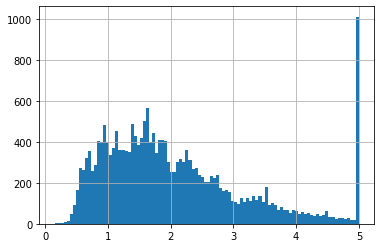

In [60]:
y.hist(bins=100)
#Выбросов нет, однако аномально-большое количесвто зданий ценой 5

In [106]:
#Матрица корреляций 
corr = x.corr().agg(np.abs)
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,0.119034,0.326895,0.004834,0.018766,0.079809,0.015176
HouseAge,0.119034,1.000000,0.153277,0.296244,0.013191,0.011173,0.108197
AveRooms,0.326895,0.153277,1.000000,0.072213,0.004852,0.106389,0.027540
Population,0.004834,0.296244,0.072213,1.000000,0.069863,0.108785,0.099773
AveOccup,0.018766,0.013191,0.004852,0.069863,1.000000,0.002366,0.002476
Latitude,0.079809,0.011173,0.106389,0.108785,0.002366,1.000000,0.924664
Longitude,0.015176,0.108197,0.027540,0.099773,0.002476,0.924664,1.000000


In [107]:
#Матрица частных корреляций
import pingouin as pg
corr2 = x.pcorr().agg(np.abs)
corr2.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,0.161871,0.384383,0.032848,0.033367,0.368545,0.351193
HouseAge,0.161871,1.000000,0.064477,0.320251,0.045460,0.269990,0.282933
AveRooms,0.384383,0.064477,1.000000,0.081742,0.010530,0.288251,0.261052
Population,0.032848,0.320251,0.081742,1.000000,0.080486,0.106306,0.077274
AveOccup,0.033367,0.045460,0.010530,0.080486,1.000000,0.035099,0.032631
Latitude,0.368545,0.269990,0.288251,0.106306,0.035099,1.000000,0.939449
Longitude,0.351193,0.282933,0.261052,0.077274,0.032631,0.939449,1.000000


In [224]:
#Из обеих матриц видна сильная корреляция между столбцами AveRooms и AveBedrms и столбцами Latitude и Longitude. 
#Но рассуждая логически, следует удалить только столбец AveBedrms, так как Более значимым признаком является общее количество всех комнат, а не всех спален. А широта и долгота важные признаки, которые могут коррелировать из-за особенности датасета 
data = data.drop(['AveBedrms'], axis=1)
x, y = data.drop('MedHouseVal', axis=1), data['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,)

In [215]:
#При удалении данных столбцов метрика сильно ухудшилась, это значит, что данные столбцы являлись важными для работы модели
rmse, r2_ = get_sqores(x_train=x_train, y_train=y_train, x_test=x_test)
print(rmse, 'rmse\n', r2_, 'r2')

0.7365757892134716 rmse
 0.5823239094526445 r2


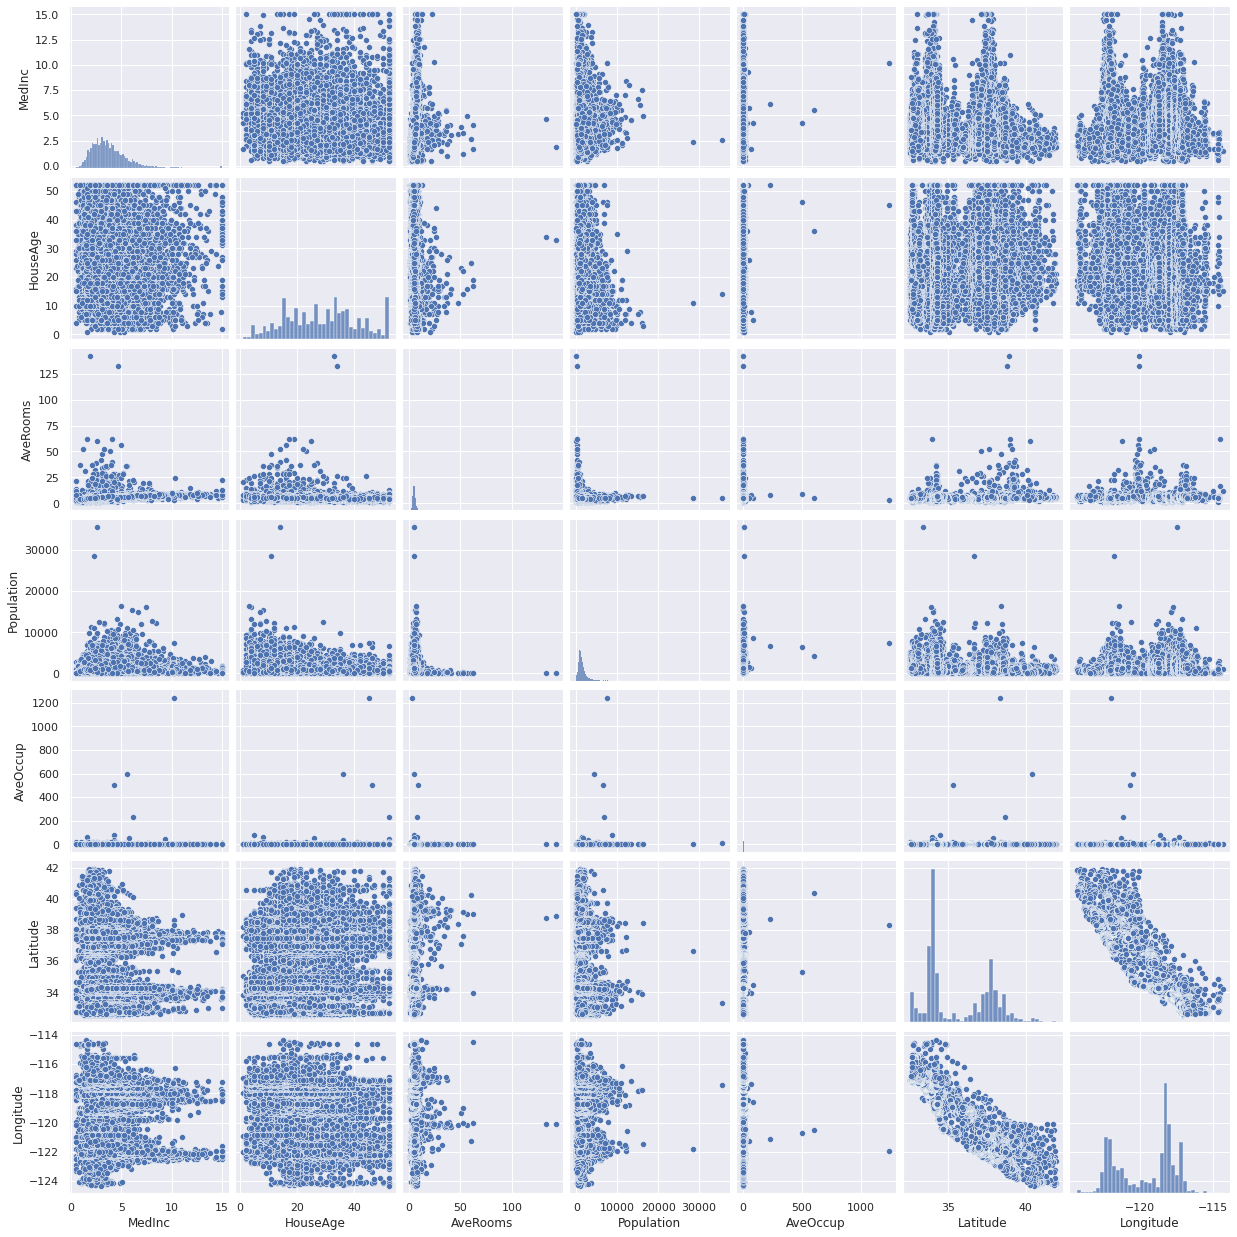

In [109]:
#Для изучения признаков на выбросы был построен график pairplot из бтблиотеки seaborn
import seaborn as sns
sns.pairplot(x)
#Из данного графика видно, что имеется достаточно большое количество выбросов 

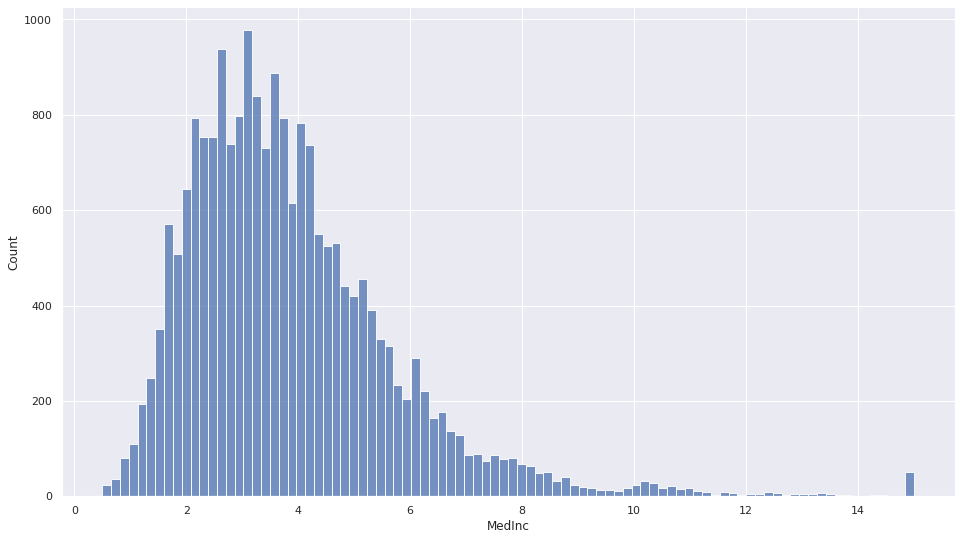

In [110]:
#Более точной оценки построим гистрограммы признаков
sns.set(rc={"figure.figsize":(16, 9)})
sns.histplot(x.MedInc)

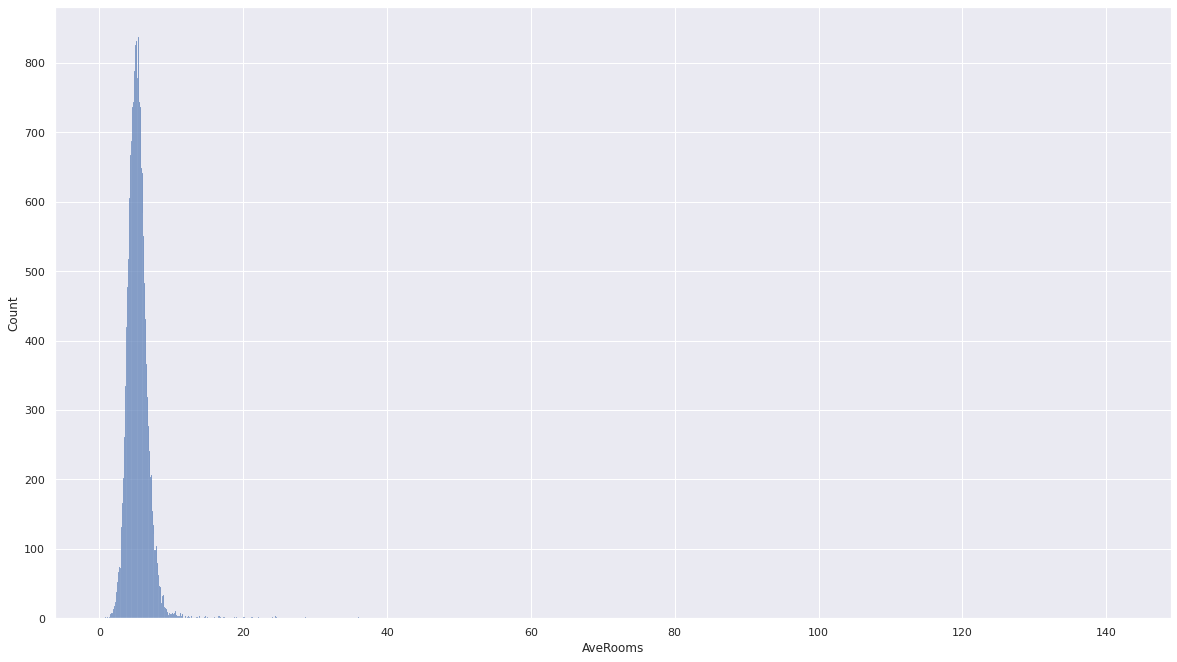

In [112]:
 sns.set(rc={"figure.figsize":(20, 11.25)})
 sns.histplot(x.AveRooms)

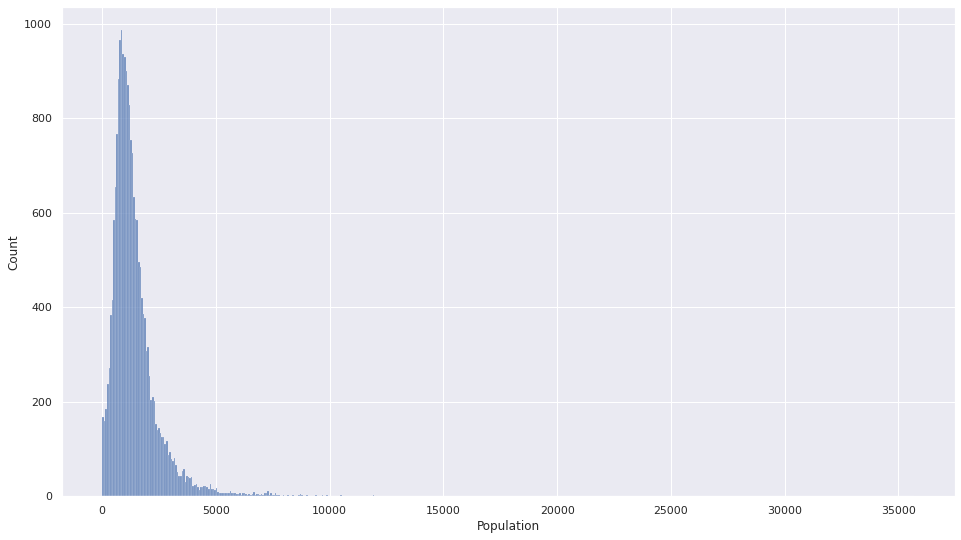

In [113]:
 sns.set(rc={"figure.figsize":(16, 9)})
 sns.histplot(x.Population)

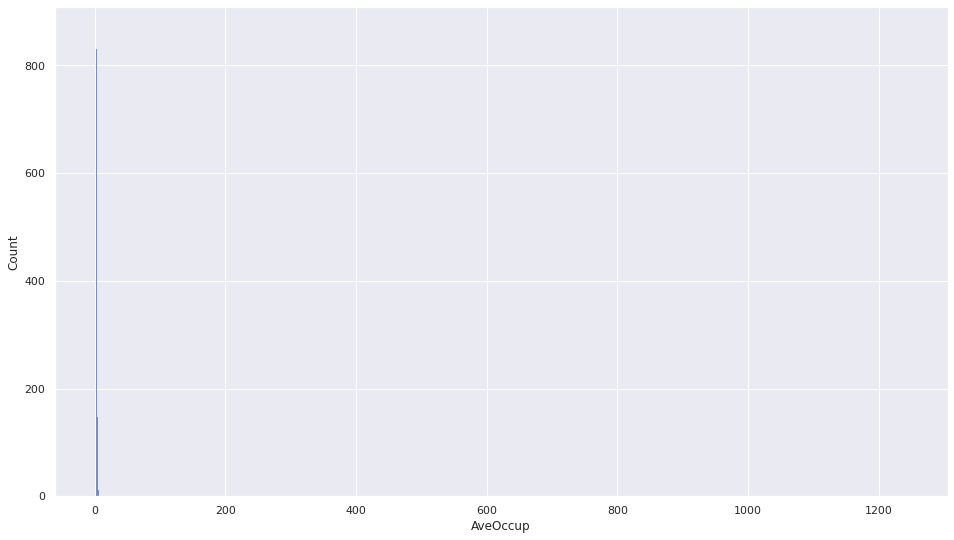

In [114]:
 sns.set(rc={"figure.figsize":(16, 9)})
 sns.histplot(x.AveOccup)
 #По данному графику очень сложно определить есть ли выбросы, поэтому посмотрим на отсортированные значения

In [93]:
x.AveOccup.sort_values().tail(80)

3058        6.497585
10567       6.516667
6348        6.571429
13890       6.630357
20297       6.634981
            ...     
9172       83.171429
13034     230.172414
16669     502.461538
3364      599.714286
19006    1243.333333
Name: AveOccup, Length: 80, dtype: float64

In [225]:
#Примерно прикинув, обозначим ограничения для признаков и изменим данные
data = data[data.MedInc < 13]
data = data[data.AveRooms < 17]
data = data[data.Population <= 7000]
data = data[data.AveOccup < 7]

In [226]:
x, y = data.drop('MedHouseVal', axis=1), data['MedHouseVal']

In [227]:
#Удаление выбросов улчшило модель на ~7%, что довольно неплохо
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,)
rmse, r2_ = get_sqores(x_train=x_train, y_train=y_train, x_test=x_test)
print(rmse, 'rmse\n', r2_, 'r')

0.7097630467742814 rmse
 0.6586750743204417 r


In [219]:
x['Population']

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: Population, Length: 20288, dtype: float64

In [264]:
data = pd.DataFrame(data=np.c_[dt['data'], dt['target']],
                     columns= dt['feature_names'] + ['MedHouseVal'])
data = data.drop(['AveBedrms'], axis=1)
data = data[data.MedInc < 13]
data = data[data.AveRooms < 17]
data = data[data.Population <= 7000]
data = data[data.AveOccup < 7]
x, y = data.drop('MedHouseVal', axis=1), data['MedHouseVal']

In [265]:
#Попробуем извлечь квадратный корень из столбца AveOccup
x['AveOccup'] = np.power(x['AveOccup'], 0.5)

In [266]:
#Полученная метрика является самой высокой среди полученных
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,)
rmse, r2_ = get_sqores(x_train=x_train, y_train=y_train, x_test=x_test)
print(rmse, 'rmse\n', r2_, 'r')

0.7071062919903996 rmse
 0.6640047667669204 r


В данной работе была построена линейная регрессия для предсказания стоимости жилья, а оценка была произведена с помощью метрик RMSE и R2. Конечная метрика равняется 66.4 % по R2. Результат довольно плохой, но лучше чем первоначальный 57.6 %. Такой низкий результат может быть обусловен несколькими факотрами:
1. Основным параметром является то, что целевым столбцом является массив со значениями от 1 до 5, что больше походит на задачу классификации, нежели на регрессию
2. Сложность модели может быть слишком высока, из-за чего линейная регрессия может не подойти.
3. Возможно не всегда выбирались нужные решения(удаления столбцов, замена значений и т.д.) 